# MIE1624 Project 3

Due: Dec 8, 2022 11:59pm

William Ferrie - 1004241509

# Part 1

[1 pt] Data collection and cleaning:

a) Adapt provided web-scraping code.

b) Save results of Indeed web-scraping to webscraping_results_assignmnet3.csv file.

c) Read webscraping_results_assignmnet3.csv file to your Jupyter notebook.

In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
df = pd.read_csv('/content/gdrive/MyDrive/_MEng/MIE1624/Project 3/webscraping_results_assignment3.csv')
# df = pd.read_csv('webscraping_results_assignment3.csv')

In [ ]:
df.head()

,Title,Company,Location,Rating,Date,Salary,Description,Links,Descriptions
0,Data Scientist,Centrifuge LLC,Remote,NaN,Hiring ongoing,"$77,768 - $122,282 a year",The ideal candidate has experience with Python...,https://www.indeed.com/company/centrifuge-llc/...,Role: Data Scientist/ML Specialist/Data Engine...
1,Data Scientist,"Shaw Industries Group, Inc.",Remote,3.8,PostedPosted 10 days ago,NaN,Partner with data scientists across the enterp...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,We are looking for a data scientist to join ou...
2,Nurse Data Miner,The Marker Group,Remote,3.0,PostedPosted 10 days ago,$30 - $38 an hour,"We are seeking full time, temporary or part-ti...",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Nurse Data Miner\nThe Marker Group is a promin...
3,Data Scientist (Remote),Yelp,Remote,3.4,PostedPosted 30+ days ago,"$96,000 - $220,000 a year","Communicate key insights from analyses, experi...",https://www.indeed.com/rc/clk?jk=0072004f2d318...,"At Yelp, it’s our mission to connect people wi..."
4,"Analyst I, Data Science",Liberty Mutual Insurance,Remote,3.6,PostedPosted 6 days ago,"$70,100 - $161,600 a year",Competencies typically acquired through a Mast...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,The Product Design and Modeling Department of ...


In [ ]:
!pip install skillNer

# the downloads before are for more accurate (but slower) spaCY pipelines
# uncomment if you want to use them instead of en_core_web_sm
# !python -m spacy download en_core_web_trf
# !python -m spacy download en_core_web_lg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 132 kB 7.9 MB/s 
  Created wheel for skillNer: filename=skillNer-1.0.3-py3-none-any.whl size=25648 sha256=03c197392eadb23b42327d7d6d4b8ef7d39efcb39cb3cee799fbc333dae754b1
  Stored in directory: /root/.cache/pip/wheels/3f/14/7c/9e5d0b245f68269e49fb10c480c582bac1031b36b630e2831b
  Created wheel for jellyfish: filename=jellyfish-0.9.0-cp38-cp38-linux_x86_64.whl size=70620 sha256=6208fd43ae69792a70af5896a1fd3455723a603c6c5d5aa806e4895b4d9f3e74
  Stored in directory: /root/.cache/pip/wheels/f1/c7/3c/4c83132de76359e3a429fd09c08995945ca96c5290a41651d3
Successfully built skillNer jellyfish


In [ ]:
from collections import Counter
from tqdm import tqdm
import time

import spacy
# import spacy_transformers # only needed if not using en_core_web_sm
from spacy.matcher import PhraseMatcher

from skillNer.general_params import SKILL_DB
from skillNer.skill_extractor_class import SkillExtractor
from skillNer.cleaner import Cleaner
from skillNer.text_class import Text

## Test out different spaCY pipelines for annotation speeds on one text sample

en_core_web_sm: ~11s 

en_core_web_lg: ~18s

en_core_web_trf on CPU: ~55s 

en_core_web_trf on GPU: ~36s


we have over 1200 samples so in the interest of computation time, we will stick with en_core_web_sm as it produces identical results to the others from the few samples I manually checked (documentation says they're more accurate but I think for our purposes the small pipline is good enough).


In [ ]:
nlp = spacy.load("en_core_web_sm")
skill_extractor = SkillExtractor(nlp, SKILL_DB, PhraseMatcher)

start = time.time()
annotations = skill_extractor.annotate(df.loc[5].Descriptions)
end = time.time()

print(end - start)
# 11s

loading full_matcher ...
loading abv_matcher ...
loading full_uni_matcher ...
loading low_form_matcher ...
loading token_matcher ...


/usr/local/lib/python3.7/dist-packages/skillNer/utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)


10.653433561325073


In [ ]:
nlp = spacy.load("en_core_web_lg")
skill_extractor = SkillExtractor(nlp, SKILL_DB, PhraseMatcher)

start = time.time()
annotations = skill_extractor.annotate(df.loc[5].Descriptions)
end = time.time()

print(end - start)
# 18s

loading full_matcher ...
loading abv_matcher ...
loading full_uni_matcher ...
loading low_form_matcher ...
loading token_matcher ...


/usr/local/lib/python3.7/dist-packages/skillNer/utils.py:99: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  vec_similarity = token1.similarity(token2)


18.53909182548523


In [ ]:
nlp = spacy.load("en_core_web_trf")
skill_extractor = SkillExtractor(nlp, SKILL_DB, PhraseMatcher)

start = time.time()
annotations = skill_extractor.annotate(df.loc[5].Descriptions)
end = time.time()

print(end - start)

#55s without CUDA on CPU runtime
#36s on GPU runtime

loading full_matcher ...
loading abv_matcher ...
loading full_uni_matcher ...
loading low_form_matcher ...
loading token_matcher ...
36.61370873451233


## Encode Skills

The below cell takes a hours to run, so I've commented it out. Instead, import the results from the cell, "annotated_webscraping_results_assignment3.csv"

In [ ]:
# # nlp = spacy.load("en_core_web_trf")
# nlp = spacy.load("en_core_web_sm")
# skill_extractor = SkillExtractor(nlp, SKILL_DB, PhraseMatcher)

# cleaner = Cleaner(include_cleaning_functions=["remove_punctuation", "remove_extra_space"])
# cleaned_text = []
# skills = []
# for i in tqdm(range(df.shape[0])):
#     _skills = []
#     text = df.loc[i].Descriptions
#     _cleaned_text = cleaner(text)
#     cleaned_text.append(_cleaned_text)
#     try:
#         annotations = skill_extractor.annotate(_cleaned_text)
#         for item in annotations['results']['ngram_scored']:
#             _skills.append(item['doc_node_value'])
#     except:
#         print("Could not annotate at index", i)
#         _skills.append([None])
#         pass
#     skills.append(_skills)

# df['cleaned_text'] = cleaned_text
# df['raw_skills'] = skills
# df.to_csv('assigment3_withskills')

loading full_matcher ...
loading abv_matcher ...
loading full_uni_matcher ...
loading low_form_matcher ...
loading token_matcher ...


  0%|          | 0/1261 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/skillNer/utils.py:99: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  vec_similarity = token1.similarity(token2)
  1%|▏         | 17/1261 [03:28<3:47:14, 10.96s/it]

Could not annotate at index 16


  2%|▏         | 20/1261 [03:31<1:27:58,  4.25s/it]

Could not annotate at index 19


  2%|▏         | 24/1261 [03:52<1:49:16,  5.30s/it]

Could not annotate at index 23


  3%|▎         | 34/1261 [06:12<3:28:45, 10.21s/it]

Could not annotate at index 33


  4%|▍         | 51/1261 [11:46<4:09:23, 12.37s/it]

Could not annotate at index 50


  5%|▍         | 63/1261 [13:57<4:00:07, 12.03s/it]

Could not annotate at index 62


 14%|█▍        | 179/1261 [56:37<5:53:34, 19.61s/it]

Could not annotate at index 178


 15%|█▍        | 183/1261 [57:55<5:52:00, 19.59s/it]

Could not annotate at index 182


 16%|█▌        | 197/1261 [1:03:13<3:22:54, 11.44s/it]

Could not annotate at index 196


 16%|█▌        | 202/1261 [1:03:41<1:36:37,  5.47s/it]

Could not annotate at index 201


 18%|█▊        | 226/1261 [1:11:19<2:26:13,  8.48s/it]

Could not annotate at index 225


 22%|██▏       | 273/1261 [1:24:59<4:05:42, 14.92s/it]

Could not annotate at index 272


 23%|██▎       | 291/1261 [1:31:13<4:16:02, 15.84s/it]

Could not annotate at index 290


 23%|██▎       | 296/1261 [1:33:30<5:51:01, 21.83s/it]

Could not annotate at index 295


 25%|██▍       | 313/1261 [1:37:47<3:06:42, 11.82s/it]

Could not annotate at index 312


 25%|██▌       | 319/1261 [1:40:14<5:10:49, 19.80s/it]

Could not annotate at index 318


 26%|██▌       | 328/1261 [1:43:58<3:43:02, 14.34s/it]

Could not annotate at index 327


 27%|██▋       | 336/1261 [1:48:26<8:18:28, 32.33s/it] 

Could not annotate at index 335


 27%|██▋       | 342/1261 [1:50:48<4:49:53, 18.93s/it]

Could not annotate at index 341


 28%|██▊       | 347/1261 [1:52:12<3:56:18, 15.51s/it]

Could not annotate at index 346


 28%|██▊       | 354/1261 [1:59:45<6:37:04, 26.27s/it]

Could not annotate at index 353


 30%|██▉       | 377/1261 [2:11:16<8:26:12, 34.36s/it] 

Could not annotate at index 376


 30%|███       | 380/1261 [2:11:59<4:57:15, 20.24s/it]

Could not annotate at index 379


 32%|███▏      | 399/1261 [2:18:35<5:41:50, 23.79s/it]

Could not annotate at index 398


 33%|███▎      | 417/1261 [2:36:50<7:50:22, 33.44s/it] 

Could not annotate at index 416


 36%|███▌      | 449/1261 [2:42:48<1:10:07,  5.18s/it]

Could not annotate at index 448


 36%|███▌      | 450/1261 [2:42:50<54:24,  4.03s/it]  

Could not annotate at index 449


 45%|████▌     | 569/1261 [3:21:35<3:48:28, 19.81s/it]

Could not annotate at index 568


 47%|████▋     | 591/1261 [3:38:14<8:13:51, 44.23s/it] 

Could not annotate at index 590


 48%|████▊     | 609/1261 [3:48:48<4:02:11, 22.29s/it]

Could not annotate at index 608


 53%|█████▎    | 674/1261 [4:19:30<2:32:20, 15.57s/it]

Could not annotate at index 673


 55%|█████▌    | 698/1261 [4:30:13<2:28:08, 15.79s/it]

Could not annotate at index 697


 55%|█████▌    | 699/1261 [4:30:33<2:37:52, 16.86s/it]

Could not annotate at index 698


 59%|█████▉    | 742/1261 [4:50:40<3:36:11, 24.99s/it]

Could not annotate at index 741


 59%|█████▉    | 743/1261 [4:50:40<2:32:41, 17.69s/it]

Could not annotate at index 742


 60%|█████▉    | 752/1261 [4:56:43<4:39:28, 32.94s/it]

Could not annotate at index 751


 61%|██████▏   | 775/1261 [5:03:54<1:08:04,  8.41s/it]

Could not annotate at index 774


 62%|██████▏   | 777/1261 [5:04:01<45:59,  5.70s/it]  

Could not annotate at index 776


 62%|██████▏   | 782/1261 [5:07:09<3:32:37, 26.63s/it]

Could not annotate at index 781


 63%|██████▎   | 796/1261 [5:11:28<3:12:42, 24.86s/it]

Could not annotate at index 795


 65%|██████▍   | 817/1261 [5:20:54<1:10:08,  9.48s/it]

Could not annotate at index 816


 65%|██████▍   | 818/1261 [5:20:55<50:44,  6.87s/it]  

Could not annotate at index 817


 66%|██████▌   | 827/1261 [5:23:19<1:13:32, 10.17s/it]

Could not annotate at index 826


 67%|██████▋   | 848/1261 [5:28:44<1:01:40,  8.96s/it]

Could not annotate at index 847


 68%|██████▊   | 860/1261 [5:31:06<57:00,  8.53s/it]  

Could not annotate at index 859


 69%|██████▊   | 865/1261 [5:32:07<56:27,  8.56s/it]  

Could not annotate at index 864


 69%|██████▉   | 871/1261 [5:34:25<2:47:55, 25.83s/it]

Could not annotate at index 870


 69%|██████▉   | 875/1261 [5:36:12<2:28:33, 23.09s/it]

Could not annotate at index 874


 78%|███████▊  | 989/1261 [6:47:53<2:20:01, 30.89s/it]

Could not annotate at index 988


 81%|████████  | 1024/1261 [7:05:54<1:26:42, 21.95s/it]

Could not annotate at index 1023


 82%|████████▏ | 1034/1261 [7:14:28<2:19:49, 36.96s/it]

Could not annotate at index 1033


 82%|████████▏ | 1040/1261 [7:24:02<3:10:45, 51.79s/it]

Could not annotate at index 1039


 84%|████████▍ | 1064/1261 [7:33:07<36:01, 10.97s/it]

Could not annotate at index 1063


 85%|████████▌ | 1078/1261 [7:38:32<40:40, 13.34s/it]

Could not annotate at index 1077


 87%|████████▋ | 1099/1261 [7:47:48<1:18:37, 29.12s/it]

Could not annotate at index 1098


 88%|████████▊ | 1108/1261 [7:51:07<37:08, 14.56s/it]

Could not annotate at index 1107


 89%|████████▊ | 1117/1261 [7:53:42<53:50, 22.43s/it]  

Could not annotate at index 1116


 89%|████████▉ | 1122/1261 [7:54:59<32:43, 14.12s/it]

Could not annotate at index 1121


 89%|████████▉ | 1126/1261 [7:55:51<23:08, 10.28s/it]

Could not annotate at index 1125


 91%|█████████ | 1144/1261 [8:03:39<40:38, 20.84s/it]

Could not annotate at index 1143


 92%|█████████▏| 1159/1261 [8:09:25<45:13, 26.60s/it]  

Could not annotate at index 1158


 93%|█████████▎| 1178/1261 [8:17:41<40:29, 29.27s/it]

Could not annotate at index 1177


 93%|█████████▎| 1179/1261 [8:17:42<28:12, 20.64s/it]

Could not annotate at index 1178


 94%|█████████▍| 1186/1261 [8:20:14<17:50, 14.27s/it]

Could not annotate at index 1185


 96%|█████████▌| 1205/1261 [8:32:44<15:44, 16.87s/it]

Could not annotate at index 1204


 98%|█████████▊| 1230/1261 [8:45:02<11:53, 23.02s/it]

Could not annotate at index 1229


 99%|█████████▉| 1254/1261 [9:10:08<04:40, 40.09s/it]

Could not annotate at index 1253


100%|█████████▉| 1257/1261 [9:11:10<01:49, 27.28s/it]

Could not annotate at index 1256


100%|██████████| 1261/1261 [9:13:19<00:00, 26.33s/it]


In [ ]:
# df.to_csv('annotated_data.csv')
# !cp data.csv "drive/My Drive/"

# PART 2: Exploratory Data Analysis and Feature Engineering

In [3]:
import ast
from collections import Counter
from tqdm import tqdm
from scipy import stats
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [5]:
# df_annotated = pd.read_csv("annotated_webscraping_results_assignment3.csv")
df_annotated = pd.read_csv("/content/gdrive/MyDrive/_MEng/MIE1624/Project 3/annotated_webscraping_results_assignment3.csv")
df_annotated = df_annotated.drop(labels = "Unnamed: 0", axis = 1)

# the skill extractor couldn't annotate some skills, and so their raw_skills
# just says "[None]". I will drop these datapoints as there aren't that many
# and afterwards our dataset will still contain >1000 datapoints 

df_annotated = df_annotated[df_annotated.raw_skills != '[[None]]']
df_annotated.reset_index(drop = True, inplace = True)
df_annotated.drop_duplicates(subset = ["Links"], ignore_index = True, inplace = True) # drop duplicate postings
print(df_annotated.shape) # 1038 job postings left
df_annotated.head()

(1038, 11)


,Title,Company,Location,Rating,Date,Salary,Description,Links,Descriptions,cleaned_text,raw_skills
0,Data Scientist,Centrifuge LLC,Remote,NaN,Hiring ongoing,"$77,768 - $122,282 a year",The ideal candidate has experience with Python...,https://www.indeed.com/company/centrifuge-llc/...,Role: Data Scientist/ML Specialist/Data Engine...,role data scientist ml specialist data enginee...,"['data engineer', 'model development', 'data p..."
1,Data Scientist,"Shaw Industries Group, Inc.",Remote,3.8,PostedPosted 10 days ago,NaN,Partner with data scientists across the enterp...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,We are looking for a data scientist to join ou...,we are looking for a data scientist to join ou...,"['analytics', 'analytics', 'help support', 'da..."
2,Nurse Data Miner,The Marker Group,Remote,3.0,PostedPosted 10 days ago,$30 - $38 an hour,"We are seeking full time, temporary or part-ti...",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Nurse Data Miner\nThe Marker Group is a promin...,nurse data miner the marker group is a promine...,"['support services', 'medical review', 'record..."
3,Data Scientist (Remote),Yelp,Remote,3.4,PostedPosted 30+ days ago,"$96,000 - $220,000 a year","Communicate key insights from analyses, experi...",https://www.indeed.com/rc/clk?jk=0072004f2d318...,"At Yelp, it’s our mission to connect people wi...",at yelp it’s our mission to connect people wit...,"['dataset', 'data science', 'analytics', 'buil..."
4,"Analyst I, Data Science",Liberty Mutual Insurance,Remote,3.6,PostedPosted 6 days ago,"$70,100 - $161,600 a year",Competencies typically acquired through a Mast...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,The Product Design and Modeling Department of ...,the product design and modeling department of ...,"['underwriting', 'team manager', 'predictive m..."


In [6]:
# the raw_skills feature posesses duplicates. This will skew our data if a job
# posting just happened to mention a skill more than once. Therefore we will
# make a new feature that contains the data in raw_skills but without duplicates

processed_skills = []
for i in range(df_annotated.shape[0]):
    _skills = df_annotated.loc[i].raw_skills
    _skills = ast.literal_eval(_skills)
    processed_skills.append(list(set(_skills)))

df_annotated['processed_skills'] = processed_skills
df_annotated.head()


,Title,Company,Location,Rating,Date,Salary,Description,Links,Descriptions,cleaned_text,raw_skills,processed_skills
0,Data Scientist,Centrifuge LLC,Remote,NaN,Hiring ongoing,"$77,768 - $122,282 a year",The ideal candidate has experience with Python...,https://www.indeed.com/company/centrifuge-llc/...,Role: Data Scientist/ML Specialist/Data Engine...,role data scientist ml specialist data enginee...,"['data engineer', 'model development', 'data p...","[machine learning, tensorflow, data pipelines,..."
1,Data Scientist,"Shaw Industries Group, Inc.",Remote,3.8,PostedPosted 10 days ago,NaN,Partner with data scientists across the enterp...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,We are looking for a data scientist to join ou...,we are looking for a data scientist to join ou...,"['analytics', 'analytics', 'help support', 'da...","[visualize information, data processing, sql, ..."
2,Nurse Data Miner,The Marker Group,Remote,3.0,PostedPosted 10 days ago,$30 - $38 an hour,"We are seeking full time, temporary or part-ti...",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Nurse Data Miner\nThe Marker Group is a promin...,nurse data miner the marker group is a promine...,"['support services', 'medical review', 'record...","[registered nurse, support services, medical r..."
3,Data Scientist (Remote),Yelp,Remote,3.4,PostedPosted 30+ days ago,"$96,000 - $220,000 a year","Communicate key insights from analyses, experi...",https://www.indeed.com/rc/clk?jk=0072004f2d318...,"At Yelp, it’s our mission to connect people wi...",at yelp it’s our mission to connect people wit...,"['dataset', 'data science', 'analytics', 'buil...","[research, user experiments, sql, small busine..."
4,"Analyst I, Data Science",Liberty Mutual Insurance,Remote,3.6,PostedPosted 6 days ago,"$70,100 - $161,600 a year",Competencies typically acquired through a Mast...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,The Product Design and Modeling Department of ...,the product design and modeling department of ...,"['underwriting', 'team manager', 'predictive m...","[research, perspective, diversity inclusion, t..."


In [7]:
# to determine the top skills mentioned among all datasets, we are going to 
# put all skills into a big list and use the Counter object to find the most
# frequestly mentioned skills. I'm not sure how efficient it is to make a list
# this massive, but i think it should be fine.

big_list_of_skills = []

for i in range(df_annotated.shape[0]):
    for skill in df_annotated.loc[i].processed_skills:
        big_list_of_skills.append(skill)

In [8]:
skill_count = Counter(big_list_of_skills)
skill_count.most_common(50) # look at top 25 most frequent skills

# from the top 50 most frequent skills, I will remove the skills that don't 
# make sense. Then we will encode those 50ish features as OHE
top_skills = ['python','machine learning','sql','analytics','scale','research',
              'algorithms','innovation','infrastructure','programming','r',
              'best practices','leadership','collaboration','data pipelines',
              'operations','data sources','management','statistics',
              'data analysis','data sets','communication skills',
              'data engineering','tableau','writing','tensorflow','automation',
              'java','pytorch','snowflake','airflow','integration','planning',
              'kubernetes','data warehouse','docker','real time','linux',
              'data modeling']

top_skills_array = []
for i in range(df_annotated.shape[0]):
    _skills_array = []
    for skill in top_skills:
        if skill in df_annotated.loc[i].processed_skills:
            _skills_array.append(1)
        else:
            _skills_array.append(0)
    top_skills_array.append(_skills_array)

# df_annotated['top_skills'] = top_skills_array

In [9]:
top_skills_df = pd.DataFrame(top_skills_array, columns = top_skills)
df_encoded_skills = pd.merge(df_annotated, top_skills_df, how = 'outer', left_index = True, right_index = True, suffixes = (None, 'skill'))
df_encoded_skills.head()

,Title,Company,Location,Rating,Date,Salary,Description,Links,Descriptions,cleaned_text,...,snowflake,airflow,integration,planning,kubernetes,data warehouse,docker,real time,linux,data modeling
0,Data Scientist,Centrifuge LLC,Remote,NaN,Hiring ongoing,"$77,768 - $122,282 a year",The ideal candidate has experience with Python...,https://www.indeed.com/company/centrifuge-llc/...,Role: Data Scientist/ML Specialist/Data Engine...,role data scientist ml specialist data enginee...,...,0,0,0,0,0,0,1,0,1,0
1,Data Scientist,"Shaw Industries Group, Inc.",Remote,3.8,PostedPosted 10 days ago,NaN,Partner with data scientists across the enterp...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,We are looking for a data scientist to join ou...,we are looking for a data scientist to join ou...,...,0,0,0,0,0,0,0,0,0,0
2,Nurse Data Miner,The Marker Group,Remote,3.0,PostedPosted 10 days ago,$30 - $38 an hour,"We are seeking full time, temporary or part-ti...",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Nurse Data Miner\nThe Marker Group is a promin...,nurse data miner the marker group is a promine...,...,0,0,0,0,0,0,0,0,0,0
3,Data Scientist (Remote),Yelp,Remote,3.4,PostedPosted 30+ days ago,"$96,000 - $220,000 a year","Communicate key insights from analyses, experi...",https://www.indeed.com/rc/clk?jk=0072004f2d318...,"At Yelp, it’s our mission to connect people wi...",at yelp it’s our mission to connect people wit...,...,0,0,0,0,0,0,0,0,0,0
4,"Analyst I, Data Science",Liberty Mutual Insurance,Remote,3.6,PostedPosted 6 days ago,"$70,100 - $161,600 a year",Competencies typically acquired through a Mast...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,The Product Design and Modeling Department of ...,the product design and modeling department of ...,...,0,0,0,0,0,0,0,0,0,0


In [10]:
len(df_encoded_skills.loc[0].processed_skills)

15

Now we will engineer 10 features based on the skills for clustering. Since we are clustering skills and not jobs, we will use the jobs dataset to build a new dataset where the skills are the rows, and the columns are the 10 new features we engineer. This dataset will be our inputs to the clustering algorithms. See below table for the features that we are going to create.


| Feature # | Feature                                | Explanation                                                                                                                                                                                                                                                                                                                                                                   |
| --------- | -------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| 1         | skill\_count                           | This is a count of the number of job in which the skill appears.                                                                                                                                                                                                                                                                                                              |
| 2         | hard\_or\_soft\_skill                  | Is the skill a technical skill or a soft skill.                                                                                                                                                                                                                                                                                                                               |
| 3         | technology\_or\_technique              | This differentiates between skills which are technologies (ex: Python, TensorFlow, R, SQL, etc.) vs skills which are techniques (ex: Machine Learning, Analytics, Communication, etc.)                                                                                                                                                                                        |
| 4         | num\_companies\_wanting\_skill         | How many companies include the skill in at least one of their job postings.                                                                                                                                                                                                                                                                                                   |
| 5         | uniqueness\_among\_skills              | If a job posting contains a given skill, on average how many other skills did they ask for? Intended to filter for jobs that may just ask for many many skills.                                                                                                                                                                                                               |
| 6         | senior\_position\_freq                 | Percentage of senior level positions that ask for this skill. Intended to indicate what skills are more represented higher up in more senior jobs.                                                                                                                                                                                                                            |
| 7         | education\_score                       | A custom score indicating the highest level of education the average job posting requests for that skill. Created by assigning job postings without education requirements 0, bachelor's 1, master's 2, and phd 3. Then summing and taking the average for postings containing a given skill. Higher score indicates skills associated with higher educational degrees.       |
| 8         | analyst/engineer/scientist\_role\_freq | Percentage of Analyst, Engineering, and Scientist job roles that request a given skill. Encoded as three different columns, but ultimately makes up one feature.                                                                                                                                                                                                              |
| 9         | remote\_role\_skill\_freq              | Percentage of remote jobs that requested a given skill. Meant to differentiate skills that are associated with more traditional in person jobs vs jobs following the newer trend of fully remote.                                                                                                                                                                             |
| 10        | Distance Matrix                        | Distance matrix of the skills relative to eachother, representative of the frequency in which skills appear together. Equal to 1 - (number of times both skills appear in a job / number of jobs where either skill appears). This will be the sole feature that is inputted into hierarchical clustering, but one of 10 features that is going to go into KMeans Clustering. |

In [11]:
# now we will engineer 10 new features for clustering

# first the Distance Matrix
distance_matrix = np.ones([len(top_skills), len(top_skills)]) # this will store our distnaces

occurances_both_skill = np.zeros([len(top_skills), len(top_skills)]) # count of number of times both skills appear TOGETHER in a posting
occurances_either_skill = np.zeros([len(top_skills), len(top_skills)]) # count of total number of times either skill appears (together or separate)

# distance matrix will = 1 - (number of jobs both skills appear / number of jobs either skill appears)

for i in tqdm(range(len(top_skills))):
    for j in range(len(top_skills)):
        for k in range(df_annotated.shape[0]):
            if (top_skills[i] in df_annotated.loc[k].processed_skills) and (top_skills[j] in df_annotated.loc[k].processed_skills):
                occurances_both_skill[i][j] += 1
                
for i in tqdm(range(len(top_skills))):
    for j in range(len(top_skills)):
        for k in range(df_annotated.shape[0]):
            if (top_skills[i] in df_annotated.loc[k].processed_skills) or (top_skills[j] in df_annotated.loc[k].processed_skills):
                occurances_either_skill[i][j] += 1
                
distance_matrix = distance_matrix - np.divide(occurances_both_skill, occurances_either_skill)

100%|██████████| 39/39 [05:45<00:00,  8.86s/it]


In [12]:
top_skills_dist = []

for name in top_skills:
    top_skills_dist.append(name + "_dist")
    
distance_matrix_pd = pd.DataFrame(distance_matrix, columns = top_skills_dist)

In [13]:
# hard vs soft skills (0 if soft, 1 if hard)
hard_skill = [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]

# technology or technqiue (0 if technique, 1 if technology)
technology = [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0]

In [14]:
# this creates a vector of 1's and 0's for if the role is a senior role (1 is senior)
senior_position = np.zeros(df_annotated.shape[0])

senior_keywords = ["senior", "sr ", "manager", "principle", "staff", "director", "sr."]
for i in range(df_annotated.shape[0]):
    for j in range(len(senior_keywords)):
        if senior_keywords[j] in df_annotated.loc[i].Title.lower():
            senior_position[i] = 1

In [15]:
# role type (data scientist vs engineer vs analyst). 
#There will be some crossover but this gives some indication to the role type

analyst_role = np.zeros(df_annotated.shape[0])
engineer_role = np.zeros(df_annotated.shape[0])
scientist_role = np.zeros(df_annotated.shape[0])


for i in range(df_annotated.shape[0]):
    if "analyst" in df_annotated.loc[i].Title.lower():
        analyst_role[i] = 1
    if "engineer" in df_annotated.loc[i].Title.lower():
        engineer_role[i] = 1
    if "scientist" in df_annotated.loc[i].Title.lower() or "science" in df_annotated.loc[i].Title.lower():
        scientist_role[i] = 1

print(sum(analyst_role))
print(sum(engineer_role))
print(sum(scientist_role))

31.0
673.0
306.0


In [16]:
# this creates a vector indicating the education level of the jobs
education_level = np.zeros(df_annotated.shape[0])

for i in range(df_annotated.shape[0]): # doing it in this order gets the highest level of education they're asking for
    if "bachelor" in df_annotated.loc[i].cleaned_text or "undergraduate" in df_annotated.loc[i].cleaned_text:
        education_level[i] = 1
    if "master" in df_annotated.loc[i].cleaned_text:
        education_level[i] = 2
    if "phd" in df_annotated.loc[i].cleaned_text or "doctorate" in df_annotated.loc[i].cleaned_text or "doctoral" in df_annotated.loc[i].cleaned_text:
        education_level[i] = 3

print(np.count_nonzero(education_level == 0)) #unknown or none
print(np.count_nonzero(education_level == 1)) #bachelors
print(np.count_nonzero(education_level == 2)) #masters
print(np.count_nonzero(education_level == 3)) #phd

433
254
221
130


In [17]:
# this creates a vector of 1's and 0's corresponding to if a job is remote (1 is remote)
remote = np.zeros(df_annotated.shape[0])

for i in range(df_annotated.shape[0]):
    if "remote" in df_annotated.loc[i].Location.lower():
        remote[i] = 1

In [18]:
# the loop below is responsible for creating a lot of the 10 features

skill_count = np.zeros(len(top_skills))
senior_positions_count = np.zeros(len(top_skills))
companies_wanting_skill = np.zeros(len(top_skills)) 
skill_uniqueness = []
education_score = []

analyst_skill_count = np.zeros(len(top_skills)) 
engineer_skill_count = np.zeros(len(top_skills)) 
scientist_skill_count = np.zeros(len(top_skills))

remote_skill_count = np.zeros(len(top_skills))

location_count = []
for i in tqdm(range(len(top_skills))):
    seen_companies = []
    num_other_skills = []
    education_levels = []
    for j in range(df_annotated.shape[0]):
        if top_skills[i] in df_annotated.loc[j].processed_skills:
            skill_count[i] += 1
            
            num_other_skills.append(len(df_encoded_skills.loc[j].processed_skills) - 1)
            education_levels.append(education_level[j])
            
            if senior_position[j] == 1: # if the position is senior
                senior_positions_count[i] += 1 # increase the number of senior jobs associated with that skill
                
            if analyst_role[j] == 1:
                analyst_skill_count[i] += 1
            if engineer_role[j] == 1:
                engineer_skill_count[i] += 1
            if scientist_role[j] == 1:
                scientist_skill_count[i] += 1
                
            if remote[j] == 1:
                remote_skill_count[i] += 1
                
            if df_annotated.loc[j].Company not in seen_companies:
                companies_wanting_skill[i] += 1
                seen_companies.append(df_annotated.loc[j].Company)
    education_score.append(np.mean(education_levels))
    skill_uniqueness.append(np.mean(num_other_skills))

100%|██████████| 39/39 [00:08<00:00,  4.81it/s]


In [19]:
# COMBINE ALL OF THE 10 FEATURES INTO ONE DATAFRAME


skills_matrix = pd.DataFrame()
skills_matrix['skill'] = top_skills # skill name
skills_matrix['skill_count'] = skill_count # number of jobs asking for the skill
skills_matrix['hard_or_soft_skill'] = hard_skill # if the skill is a hard or soft skill
skills_matrix['technology_or_technique'] = technology # if the skill is a technology or a technique
skills_matrix['num_companies_wanting_skill'] = companies_wanting_skill # how many unique companies want the skill
skills_matrix['uniqueness_among_skills'] = skill_uniqueness # in a job posting containing a given skill, on average how many other skills did they want
skills_matrix['senior_position_freq'] = senior_positions_count / sum(senior_position)
skills_matrix['education_score'] = education_score
skills_matrix['analyst_role_skill_freq'] = analyst_skill_count / sum(analyst_role)
skills_matrix['engineer_role_skill_freq'] = engineer_skill_count / sum(engineer_role)
skills_matrix['scientist_role_skill_freq'] = scientist_skill_count / sum(scientist_role)
skills_matrix['remote_role_skill_freq'] = remote_skill_count / sum(remote)


engineered_skill_matrix = pd.merge(skills_matrix, distance_matrix_pd, how = 'outer', left_index = True, right_index = True, suffixes = (None, 'skill')) # combine engineered features with distance matrix
engineered_skill_matrix

,skill,skill_count,hard_or_soft_skill,technology_or_technique,num_companies_wanting_skill,uniqueness_among_skills,senior_position_freq,education_score,analyst_role_skill_freq,engineer_role_skill_freq,...,snowflake_dist,airflow_dist,integration_dist,planning_dist,kubernetes_dist,data warehouse_dist,docker_dist,real time_dist,linux_dist,data modeling_dist
0,python,729.0,1,1,502.0,29.625514,0.669261,1.091907,0.548387,0.673105,...,0.875168,0.878505,0.897638,0.917105,0.898936,0.901316,0.898531,0.895020,0.907133,0.899598
1,machine learning,548.0,1,0,366.0,29.750000,0.575875,1.293796,0.129032,0.466568,...,0.940323,0.903494,0.910744,0.935323,0.888316,0.956938,0.881944,0.909710,0.917667,0.926298
2,sql,485.0,1,1,352.0,29.872165,0.517510,0.960825,0.806452,0.423477,...,0.844358,0.881801,0.906422,0.907547,0.908411,0.834320,0.920074,0.927509,0.930320,0.871094
3,analytics,399.0,1,0,267.0,32.408521,0.381323,1.100251,0.612903,0.312036,...,0.860987,0.876652,0.884026,0.921225,0.942675,0.885210,0.951271,0.913717,0.945295,0.858469
4,scale,334.0,1,0,234.0,31.589820,0.466926,1.170659,0.129032,0.335810,...,0.886935,0.870558,0.917275,0.945813,0.881137,0.934625,0.888889,0.899225,0.928021,0.927136
5,research,268.0,1,0,186.0,31.335821,0.198444,1.417910,0.161290,0.213967,...,0.964286,0.917143,0.923295,0.938416,0.914201,0.946479,0.926254,0.931751,0.929878,0.912651
6,algorithms,266.0,1,0,199.0,32.127820,0.206226,1.421053,0.096774,0.227340,...,0.946629,0.932011,0.897661,0.934911,0.926471,0.963788,0.899696,0.905199,0.951952,0.934718
7,innovation,237.0,0,0,136.0,32.755274,0.291829,1.160338,0.258065,0.233284,...,0.938650,0.888179,0.925926,0.935691,0.929936,0.917981,0.949527,0.921311,0.922559,0.928571
8,infrastructure,222.0,1,0,187.0,31.477477,0.241245,0.815315,0.000000,0.276374,...,0.881757,0.859589,0.936102,0.960526,0.845324,0.931596,0.891986,0.909722,0.914591,0.939394
9,programming,216.0,1,0,156.0,31.189815,0.167315,1.421296,0.193548,0.197623,...,0.954984,0.883959,0.920792,0.938356,0.950000,0.870175,0.931507,0.952381,0.884328,0.904255


## Visualizations

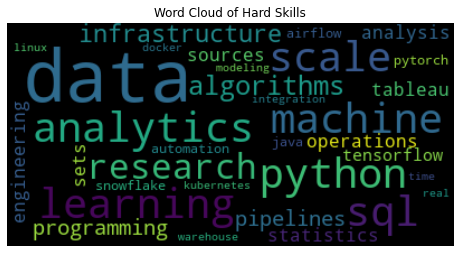

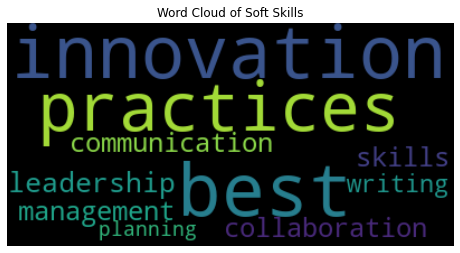

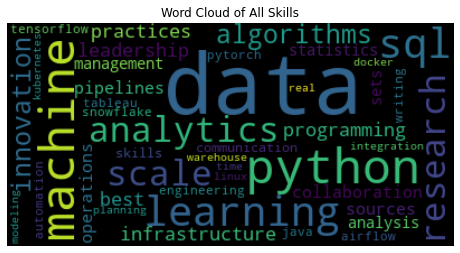

In [20]:
plt.rcParams["figure.figsize"] = (8, 8)

hard_skills = ""
soft_skills = ""
all_skills = ""

for i in range(engineered_skill_matrix.shape[0]):
    if engineered_skill_matrix.loc[i].hard_or_soft_skill == 1:
        hard_skills += engineered_skill_matrix.loc[i].skill + " "
    else:
        soft_skills += engineered_skill_matrix.loc[i].skill + " "
    
    all_skills += engineered_skill_matrix.loc[i].skill + " "



wordcloud_hard_skills = WordCloud().generate(hard_skills)
plt.imshow(wordcloud_hard_skills, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Hard Skills")
plt.show()

wordcloud_soft_skills = WordCloud().generate(soft_skills)
plt.imshow(wordcloud_soft_skills, interpolation='bilinear')
plt.title("Word Cloud of Soft Skills")
plt.axis("off")
plt.show()

wordcloud_all_skills = WordCloud().generate(all_skills)
plt.imshow(wordcloud_all_skills, interpolation='bilinear')
plt.title("Word Cloud of All Skills")
plt.axis("off")
plt.show()


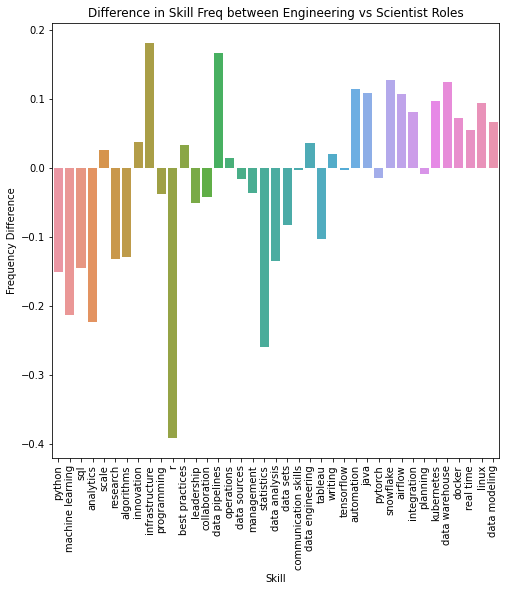

In [21]:
sns.barplot(x = engineered_skill_matrix.skill, y = engineered_skill_matrix.engineer_role_skill_freq - engineered_skill_matrix.scientist_role_skill_freq)
plt.xticks(rotation = 90)
plt.title("Difference in Skill Freq between Engineering vs Scientist Roles")
plt.ylabel("Frequency Difference")
plt.xlabel("Skill")
plt.show()
# Positive indicates more freq in Engineering, Negative indicates more freq in Scientist roles

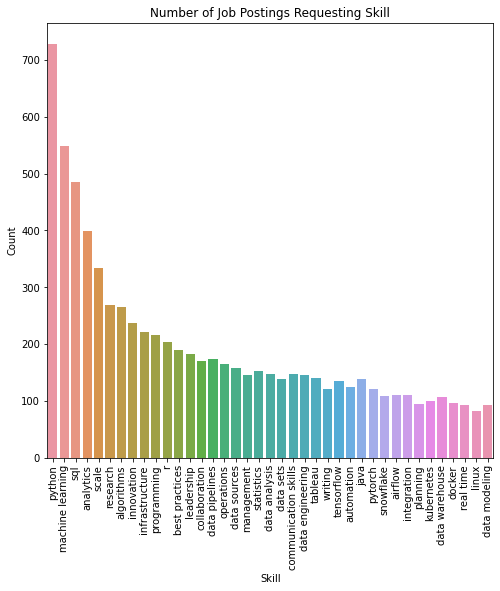

In [22]:
sns.barplot(x = engineered_skill_matrix.skill, y = engineered_skill_matrix.skill_count)
plt.xticks(rotation = 90)
plt.title("Number of Job Postings Requesting Skill")
plt.ylabel("Count")
plt.xlabel("Skill")
plt.show()

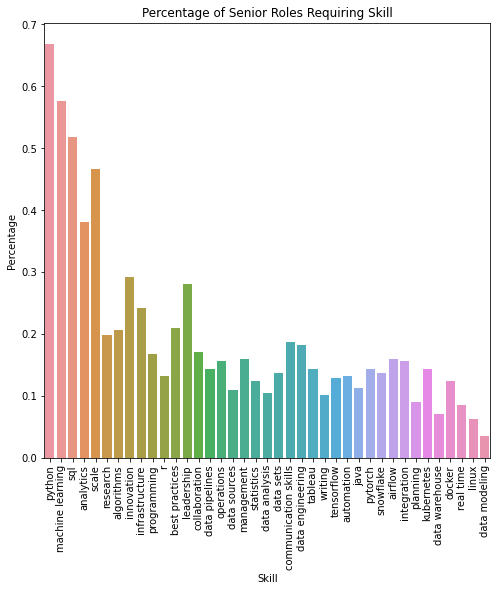

In [23]:
sns.barplot(x = engineered_skill_matrix.skill, y = engineered_skill_matrix.senior_position_freq)
plt.xticks(rotation = 90)
plt.title("Percentage of Senior Roles Requiring Skill")
plt.ylabel("Percentage")
plt.xlabel("Skill")
plt.show()

In [24]:
engineered_skill_matrix.head()

,skill,skill_count,hard_or_soft_skill,technology_or_technique,num_companies_wanting_skill,uniqueness_among_skills,senior_position_freq,education_score,analyst_role_skill_freq,engineer_role_skill_freq,...,snowflake_dist,airflow_dist,integration_dist,planning_dist,kubernetes_dist,data warehouse_dist,docker_dist,real time_dist,linux_dist,data modeling_dist
0,python,729.0,1,1,502.0,29.625514,0.669261,1.091907,0.548387,0.673105,...,0.875168,0.878505,0.897638,0.917105,0.898936,0.901316,0.898531,0.895020,0.907133,0.899598
1,machine learning,548.0,1,0,366.0,29.750000,0.575875,1.293796,0.129032,0.466568,...,0.940323,0.903494,0.910744,0.935323,0.888316,0.956938,0.881944,0.909710,0.917667,0.926298
2,sql,485.0,1,1,352.0,29.872165,0.517510,0.960825,0.806452,0.423477,...,0.844358,0.881801,0.906422,0.907547,0.908411,0.834320,0.920074,0.927509,0.930320,0.871094
3,analytics,399.0,1,0,267.0,32.408521,0.381323,1.100251,0.612903,0.312036,...,0.860987,0.876652,0.884026,0.921225,0.942675,0.885210,0.951271,0.913717,0.945295,0.858469
4,scale,334.0,1,0,234.0,31.589820,0.466926,1.170659,0.129032,0.335810,...,0.886935,0.870558,0.917275,0.945813,0.881137,0.934625,0.888889,0.899225,0.928021,0.927136


# PART 3: Hierarchical Clustering Implementation

In [25]:
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from scipy.spatial.distance import squareform
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import ClusterWarning
from warnings import simplefilter
simplefilter("ignore", ClusterWarning)

plt.rcParams["figure.figsize"] = (8,8)

In [26]:
# in part 2 we engineered the distance matrix feature which we will use for hierarchical clustering
distance_matrix

array([[0.        , 0.50117371, 0.49566295, ..., 0.89502019, 0.90713324,
        0.89959839],
       [0.50117371, 0.        , 0.72469136, ..., 0.90971039, 0.91766724,
        0.92629816],
       [0.49566295, 0.72469136, 0.        , ..., 0.92750929, 0.93032015,
        0.87109375],
       ...,
       [0.89502019, 0.90971039, 0.92750929, ..., 0.        , 0.95209581,
        0.93063584],
       [0.90713324, 0.91766724, 0.93032015, ..., 0.95209581, 0.        ,
        0.87898089],
       [0.89959839, 0.92629816, 0.87109375, ..., 0.93063584, 0.87898089,
        0.        ]])

In [36]:
# Piazza post said we could use sklearn and SciPy to do the clustering
# so i will use sklearn Agglomerative clustering model. plot_dendrogram
# function is taken from sklearn's user guide on Agglomerative clustering
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs, labels = top_skills)

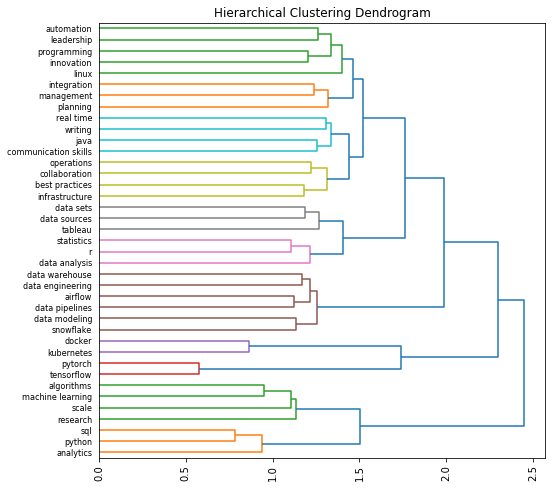

In [47]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(distance_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="level", p=15, color_threshold = 1.4, orientation = 'right')
# plt.ylabel("Number of points in node (or index of point if no parenthesis).")
plt.xticks(rotation = 90)
plt.show()

I have chosen to include 10 clusters (marked in the different colours), with a cutoff of the dendrogram at 1.4, and have annotated the different clusters with potential names, and will go in depth into the content and skills taught in each course in part 5. The clusters here I feel are very related (although there are a few inevitable outliers and some crossover between clusters). The main content of the clusters however I believe are sound and practical, and just require some minor tweaking and refining. 

![Annotated Courses](vis/annotatedCourses.png)

# PART 4: K-Means Clustering Implementation

In [29]:
import os
os.environ["OMP_NUM_THREADS"] = '1'
# used to solve potential memory leak from KMeans

In [30]:
# !pip install threadpoolctl

In [31]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler

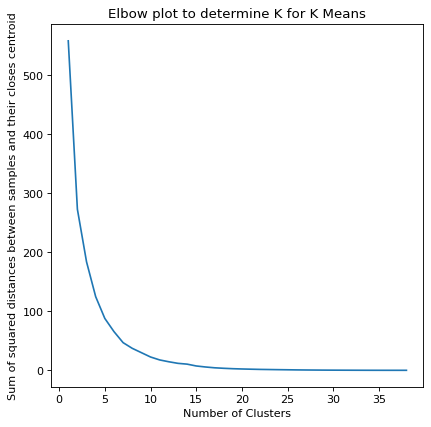

In [60]:
engineered_skill_matrix_scaled = StandardScaler().fit_transform(engineered_skill_matrix.drop(labels = 'skill', axis = 1))


figure(figsize=(6, 6), dpi=80)

# need to do PCA to bring our many dimensions down to only 2 so we can visualize the results
pca = PCA(n_components = 2)
pca_data = pca.fit_transform(engineered_skill_matrix_scaled)


# perform KMeans and use elbow method to determine number of clusters
inertias = []

for i in range(1, len(top_skills)):
    kmeans = KMeans(n_clusters=i, random_state=42).fit(pca_data)
    inertias.append(kmeans.inertia_)


sns.lineplot(x = [i for i in range(1, len(top_skills))], y = inertias)
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of squared distances between samples and their closes centroid")
plt.title("Elbow plot to determine K for K Means")
plt.show()

# The elbow plot looks like about 5 is the best number of clusters, but we are going to go with 8 as that's the minimum number
# of courses we are designing for. Choosing 8 is okay because it's still on the elbow, but probably wouldn't want to go past 10.

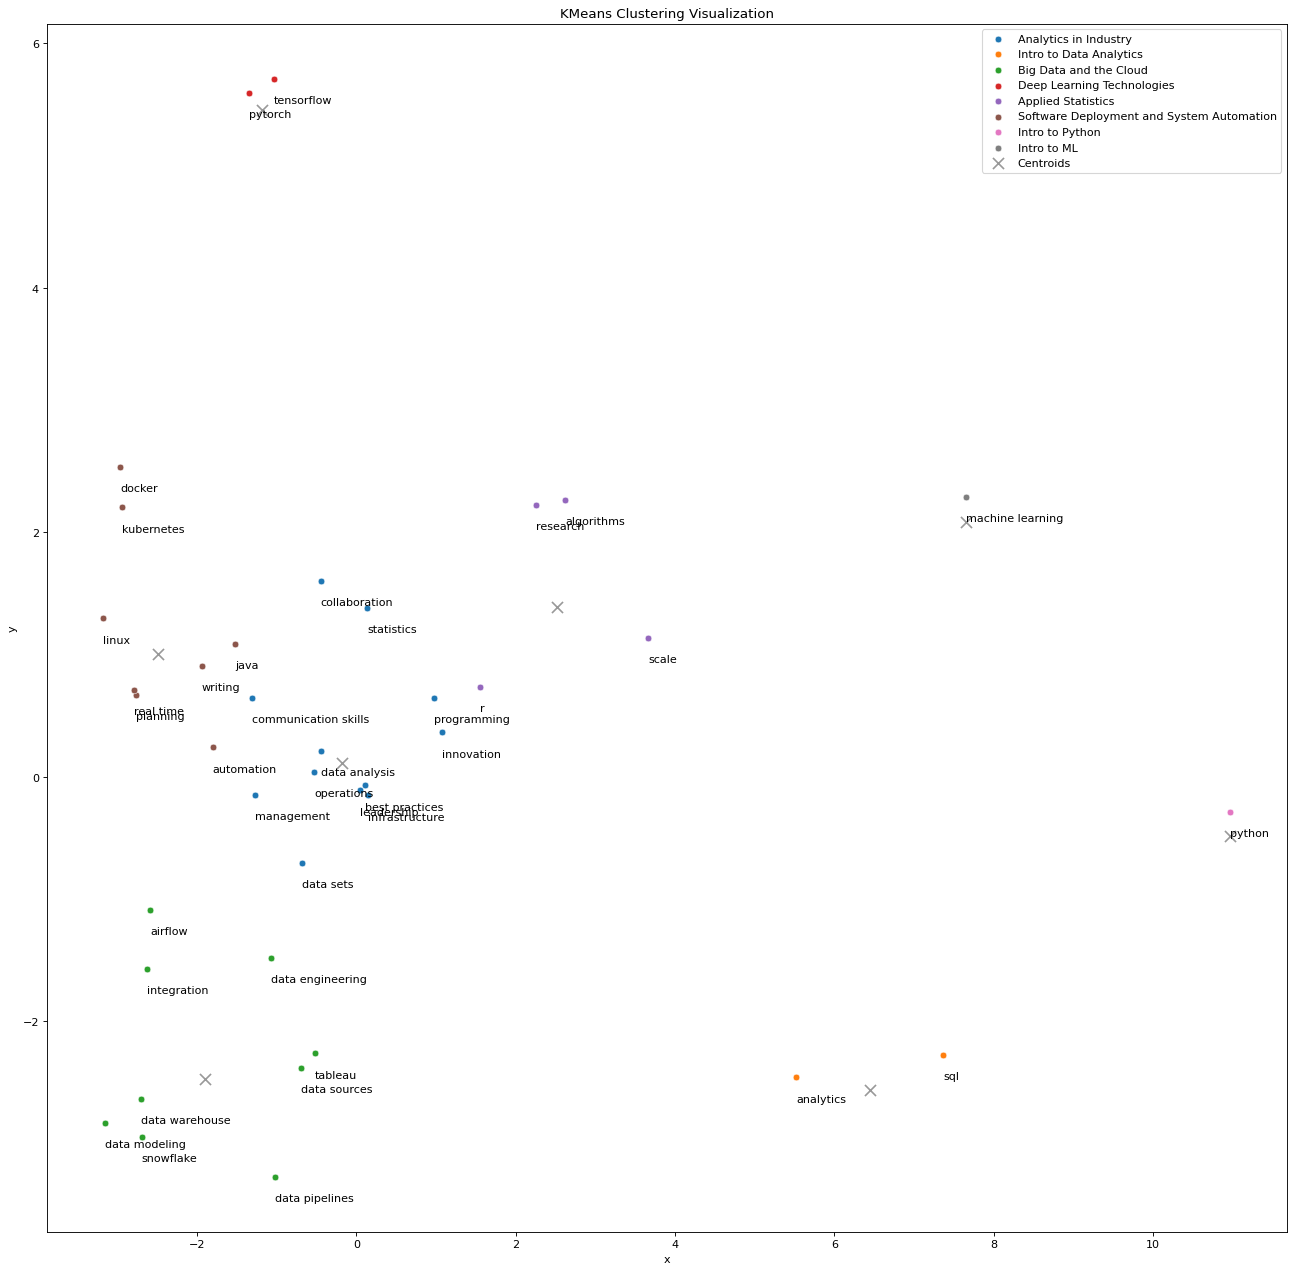

In [62]:
figure(figsize=(20, 20), dpi=80) # going to make the plot very big so we can read the labels

number_of_clusters = 8
kmeans = KMeans(n_clusters=number_of_clusters, random_state=42).fit(pca_data)

labels = kmeans.labels_
df_clusters = pd.DataFrame()
df_clusters['skill'] = top_skills
df_clusters['cluster_label'] = labels
df_clusters['x'] = pca_data[:, 0]
df_clusters['y'] = pca_data[:, 1]
df_clusters.head()

kwargs = dict(cmap = plt.cm.get_cmap('Dark2', 10),
              edgecolor='none', alpha=1)


for i in range(df_clusters.shape[0]):
    sns.scatterplot(x = df_clusters[df_clusters.cluster_label == i].x, y = df_clusters[df_clusters.cluster_label == i].y+0.2)
    
for i in range(df_clusters.shape[0]):
    plt.text(df_clusters.loc[i].x, y = df_clusters.loc[i].y, s = df_clusters.loc[i].skill)
    
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=100, alpha = 0.4, linewidths=2, color="black", zorder=10)

plt.legend(['Analytics in Industry', 'Intro to Data Analytics', 'Big Data and the Cloud', 'Deep Learning Technologies', 'Applied Statistics', 'Software Deployment and System Automation', 'Intro to Python', 'Intro to ML', 'Centroids'])
plt.title("KMeans Clustering Visualization")
plt.show()

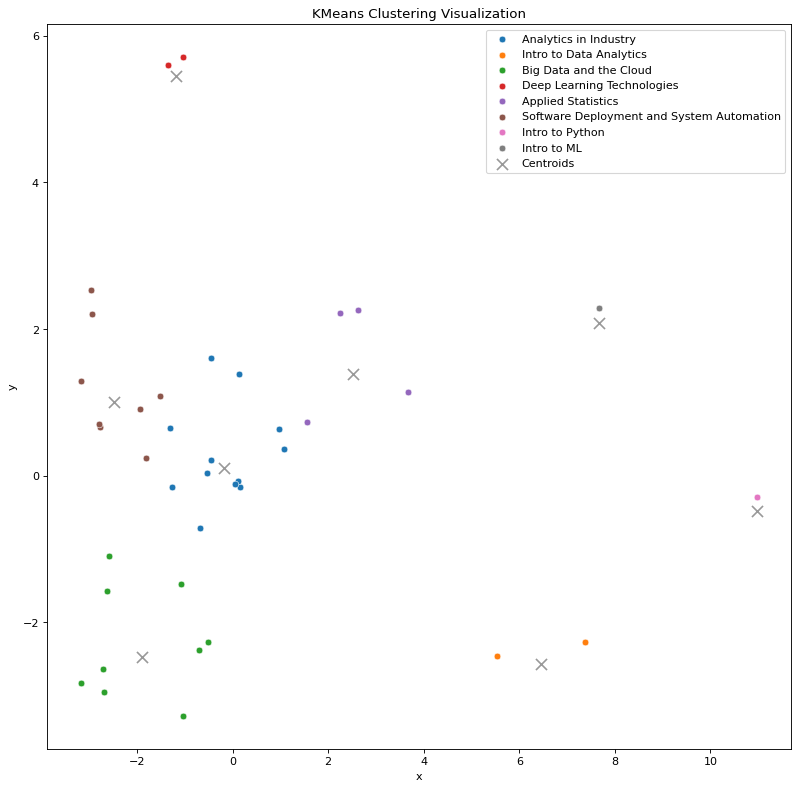

In [46]:
#  Alternatively hide the labels, and print the dataframe to see the clustering
figure(figsize=(12, 12), dpi=80)

for i in range(df_clusters.shape[0]):
    sns.scatterplot(x = df_clusters[df_clusters.cluster_label == i].x, y = df_clusters[df_clusters.cluster_label == i].y+0.2) 
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=100, alpha = 0.4, linewidths=2, color="black", zorder=10)

plt.legend(['Analytics in Industry', 'Intro to Data Analytics', 'Big Data and the Cloud', 'Deep Learning Technologies', 'Applied Statistics', 'Software Deployment and System Automation', 'Intro to Python', 'Intro to ML', 'Centroids'])
plt.title("KMeans Clustering Visualization")
plt.show()

In [35]:
# and now show the skills and their associated clusters
df_clusters

,skill,cluster_label,x,y
0,python,6,10.972814,-0.486297
1,machine learning,7,7.659436,2.087399
2,sql,1,7.367051,-2.473979
3,analytics,1,5.524325,-2.659405
4,scale,4,3.663814,0.937011
5,research,4,2.255554,2.025289
6,algorithms,4,2.617300,2.064864
7,innovation,0,1.076451,0.163737
8,infrastructure,0,0.149883,-0.353327
9,programming,0,0.973945,0.443443


# PART 5

Please see report for discussion on this section